## Hour of Code: Artificial Intelligence




### Note: This is a jupyter notebook. You can run every code cell by pressing Shift + Enter. You can edit any text cell(markdown cell) by double clicking on it. This cell for example is a text cell. 

### The MNIST Dataset
#### The MNIST dataset consists of 70,000 grayscale, 28 x 28 images. An 28 x 28 grayscale image is a 2D matrix consisting of 28 rows and 28 columns where each entry of the matrix is a number between 0(white) and 1(black). A matrix can be represented in Python using a Numpy array. 

#### Press Shift-Enter to run the cell below to load the images and import the required libraries. 

In [35]:
# press Shift-Enter to run this cell!
from mnist_loader import load_data_wrapper
import numpy as np
import matplotlib.pyplot as plt
training_data, validation_data, test_data = load_data_wrapper()

#### The variables training_data, validation_data and test_data above are each a list of (image, label) tuples where image and label are numpy arrays. 

#### We will only use the training data set for this lab. How many images are in training_data? Answer: training data is a list of 50000 (image, label) tuples. 


In [36]:
print(len(training_data))

50000


#### Unpack the first image into two variables img1, lb1. Use the shape attribute of a Numpy array to see the dimension of an array. What is the shape of each image(img1.shape)? What is the shape of each label? 

In [37]:
img1, lb1 = training_data[0]

In [38]:
print(img1.shape)
print(lb1.shape)

(784, 1)
(10, 1)


In [3]:
img1, lb1 = training_data[0]
print(img1.shape)
print(lb1.shape)

(784, 1)
(10, 1)


#### An image is a 2D numpy arrays of shape (784,1). The shape (784, 1) represents a 2D matrix with 784 rows and 1 column. It is a flattened version of a 28 x 28 image. Each entry of the matrix is a number between 0(white) and 1(black). We can reshape it and print out its values. Try:

```python
print(img1.reshape(28, 28))
```

In [39]:
print(img1.reshape(28, 28))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#### A label is a Numpy array which has the shape (10, 1). It is a one-hot encoding. Every entry of this array is 0 except for one entry which has the value 1. The index of the 1 indicates the digit the label represents. For example, if the 1 is at index 5, then it represents the digit 5. 

#### Print out the lb1. What digit is this first image of the training set? (Answer: 5) 

In [5]:
print(lb1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [40]:
img100, lb100 = training_data[99]
print(lb100)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#### Unpack the 100th image of the training_data list into an (image, label) tuple. Print out the label. What digit is this image? (Answer: 1) 

In [6]:
img99, lb99 = training_data[99]
print(lb99)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#### The function plot_image below draw an MNIST image using the matplotlib library. Remember to run it by pressing Shift-Enter!

In [41]:
def plot_image(image):
    """ Plot a single MNIST image."""
    image = image.reshape(28,28)
    fig, axes = plt.subplots()
    axes.matshow(image, cmap=plt.cm.binary)
    plt.show()

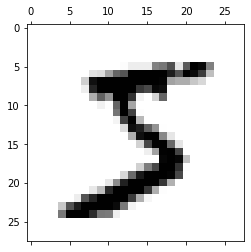

In [42]:
plot_image(img1)

#### Call the function to plot the first image. In this case, we do not want to print the returned value of the function. Rather, we want the jupyter notebook to output its value. Call the function plot_image and then press Shift-Enter to output its value which is the image. 

Do this:
```python
plot_image(img1)
````

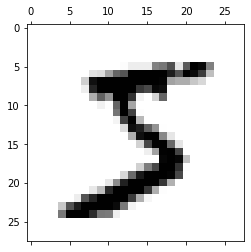

In [8]:
plot_image(img1)

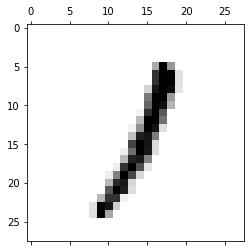

In [9]:
plot_image(img99)

#### The function plot_images below draw a list of images. Remember to run it by pressing Shift-Enter!

In [43]:
def plot_images(images):
    "Plot a list of MNIST images."
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

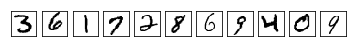

In [45]:
plot_images(training_data[12:23])

#### Call the function above to plot first 10 images. Use slicing on the training_data list!

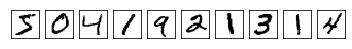

In [11]:
plot_images(training_data[:10])

#### The sigmoid function is define as $$\sigma(x)=\frac{1}{1+e^{-x}}.$$ Implement the sigmoid function. Hint: Use np.exp() for the exponential function. 

In [17]:
def sigmoid(x):
    """Returns the output of the sigmoid or logistic function."""
    return 1/(1+np.exp(-x))
    

Given a vector $\vec{x}\in\mathbb{R}^n$, the sigmoid function $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ can be extended to a vector-valued function $\sigma:\mathbb{R}^n\rightarrow\mathbb{R}^n$ by applying $\sigma$ elementwise. 
That is, if
$$\vec{x}=\left[ \begin{array}{cccc}
x_{1} \\
x_{2} \\
\vdots \\
x_{m} 
\end{array} \right]$$
then
$$\sigma(\vec{x})=\left[ \begin{array}{cccc}
\sigma(x_{1}) \\
\sigma(x_{2}) \\
\vdots \\
\sigma(x_{m}) 
\end{array} \right].$$

Similarly, $\sigma$ can be applied to a $m\times n$ matrix elementwise. 
For example, if $$\vec{x}=\left[ \begin{array}{cccc}
1 \\
2 \\
3 
\end{array} \right]$$
then
$$\sigma(\vec{x})=\left[ \begin{array}{cccc}
\sigma(1) \\
\sigma(2) \\
\sigma(3) 
\end{array} \right]\approx\left[ \begin{array}{cccc}
0.73 \\
0.88 \\
0.95 
\end{array} \right]$$

In [5]:
x = np.array([[1],[2],[3]])
sigmoid(x)


array([[0.73105858],
       [0.88079708],
       [0.95257413]])

The operation $AB$ is matrix multiplication. For example:

$$\left[\begin{array}{rr}
1 & 2 \\
3 & 4
\end{array}\right]\left[\begin{array}{r}
1 \\
2
\end{array}\right]=\left[\begin{array}{r}
5 \\
11
\end{array}\right]$$ 



#### Use np.dot(A, B) to calculate the matrix multiplication AB below.

In [12]:
A = np.array([[1,2],[3,4]])
B = np.array([[1],[2]])
np.dot(A, B)


array([[ 5],
       [11]])

Define $p_1(\vec{x})=W_1\vec{x}+\vec{b}_1$ and $p_2(\vec{x})=W_2\vec{x}+\vec{b}_2$ for some matrices $W_1, W_2, \vec{b}_1, \text{and } \vec{b}_2$ where the product is matrix multiplication and the addition is matrix addition.  

Consider the classifier or score function $f=\sigma\circ p_2\circ\sigma\circ p_1:\mathbb{R}^{784}\rightarrow\mathbb{R}^{10}.$ This is a two-layer neural network. Assume that the hidden layer is 30-dimensional. The score function takes a flattened MNIST image of shape `(784,1)` and output a one-hot vector of shape `(10,1)`. The class with the highest score is the label predicted by the classifier. 

Training a neural network amounts to producing a set parameters $W_1, W_2, \vec{b}_1, \text{and } \vec{b}_1$ whose score function $f(x; W_1, W_2, \vec{b}_1, \vec{b}_2)$ can accurately classify unseen images. 


#### What are the dimensions of $W_1,W_2,b_1,b_2$? Write your answer in this cell using markdown.

Answer: W1: (30,784), b1: (30,1), W2: (10,30), b2: (10,1)

To demonstrate an example of such a score function, let's load up a set of parameters that has been trained. 

In [13]:
with open("parameters.npy", mode="rb") as r:
    parameters = np.load(r, allow_pickle = True)
    W1, B1, W2, B2 = parameters

#### Implement the score function with these set of parameters. 

In [26]:
def f(x, W1, W2, B1, B2):
    """Return the output of the network if ``x`` is input image and
    W1, W2, B1 and B2 are the learnable weights. """
    #Z1 = W1*x+B1  (* represents matrix multiplication, for example, np.dot(A, B) is A*B)
    Z1 = np.dot(W1, x) + B1
    #A1 = sigmoid(Z1)
    A1 = sigmoid(Z1)
    #Z2 = W2*A1+B2 (* represents matrix multiplication)
    Z2 = np.dot(W2, A1) + B2
    #A2 = sigmoid(Z2)
    A2 = sigmoid(Z2)
    label = np.argmax(A2)
    return label


In [20]:
print(img1.shape)


(784, 1)


In [30]:
f(img99, W1, W2, B1, B2)

1

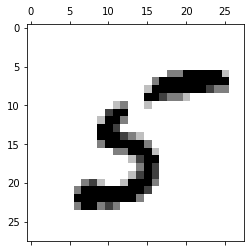

In [24]:
img47, lb47 = training_data[47]
plot_image(img47)

In [25]:
f(img47, W1, W2, B1, B2)

array([[2.53715393e-05],
       [1.33066136e-06],
       [5.38327853e-12],
       [1.63185682e-06],
       [2.44869042e-06],
       [9.99999711e-01],
       [2.51329419e-10],
       [3.03440414e-07],
       [2.13043894e-06],
       [1.36756548e-11]])

#### Apply your score function above to the first two images of training_data. Does it classify them correctly?  
```python
img, lbl = training_data[0]
f(img, W1, W2, B1, B2)
```


#### The predict function below predict a list of images.

In [31]:
def predict(images, W1, W2, B1, B2):
    predictions = []  #empty list
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(a) # add prediction to predictions list
    return predictions

#### Call predict above with the first 10 images of the training data. Does it classify them correctly? (Answer 10 out of 10). But this is not surprising since the algorithm was trained on these images, that is, the algorithm has already seen these pictures. Repeat this problem by predicting the first 10 images of the test data which contains images that the algorithm has NOT seen. 

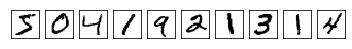

In [32]:
plot_images(training_data[:10])

In [34]:
predict(training_data[:10], W1, W2, B1, B2)

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]